## WeRateTheDogs

### By Muhammad AbdelAziz


#### Project Map
A little introduction into mapping this .ipynb
* I start with importing the required liberaries
* At the head of each section a title in H2 font will be present
* At the very bottom; a table of project Details appears, where you can click on the title to get directed to the requred section

In [1]:
#Importing the expected required liberaries
#I also add more liberaries in the same cell whenever I discover it will be needed for future codes
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import datetime
import os
%matplotlib inline
from timeit import default_timer as timer
from wordcloud import WordCloud, STOPWORDS

<a id='g_d'></a>
## Gathering Data

###### 3 Datasets should be available and ready to be used
* 1st will be called <b>ta_df</b> (twitter-archive-enhanced.csv)
* 2nd will be called <b>ip_df</b> (image_predictions.tsv)
* 3rd will be called <b>api_df</b> (tweet-json.txt)

In [2]:
# Usually I choose short names for df_s for easier repetitive actions
#ta stands for twitter archive
ta_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#I was given the 2nd dataset in a form of link below 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response will help me to read the dataset
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [4]:
#Image predictions dataset
ip_df= pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,'retweet_count': retweet_count,'favorite_count': fav_count,'user_count': user_count})

api_df = pd.DataFrame(df_list)

<a id='a_d'></a>
## Assessing Data

Detect and document at least eight <b>(8) quality issues</b> and <b>two (2) tidiness issues</b>.

<a id='a_d1'></a>


<b>1. Twitter Archived Enhanced</b>

In [7]:
print('twitter_archive_enhanced file representd here as ta_df has {} lines and {} columns'.format(ta_df.count().max(),len(ta_df.columns)))

twitter_archive_enhanced file representd here as ta_df has 2356 lines and 17 columns


#### Visual Assessment

In [8]:
ta_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


###### Programatic Assessment

In [9]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
ta_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
ta_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
#Taking some notes on numerator column as it seems some odd values do exist
odd_rat_list=[420,0,75,80,20,24,26,44,50,60,165,84,88,144,182,143,666,960,1776,27,45,99,121,204]
for rat_ in odd_rat_list:
    print(ta_df.loc[ta_df.rating_numerator == rat_, 'text'])


188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
1202    This is Bluebert. He just saw that both #Final...
Name: text, dtype: object
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dty

In [13]:
odd_rat_ind=[188,2074,315,1016,340,695,1254,1663,516,1712,1433,1202,1351,902,433,1843,1779,290,1634,189,313,979,763,1274,1228,1635,1120]
for ind_rat in odd_rat_ind:
    print('[',ind_rat,']',ta_df['text'][ind_rat])
    print('(',ta_df['rating_numerator'][ind_rat],'/',ta_df['rating_denominator'][ind_rat],')\n')

[ 188 ] @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
( 420 / 10 )

[ 2074 ] After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
( 420 / 10 )

[ 315 ] When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
( 0 / 10 )

[ 1016 ] PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
( 0 / 10 )

[ 340 ] RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
( 75 / 10 )

[ 695 ] This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
( 75 / 10 )

[ 1254 ] Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
( 80 / 80 )

[ 1663 ] I'm aware that I could've said 20/16, but here at WeRateDog

In [14]:
ta_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
#Some thing with denominator
wrong_den=[2,16,15,7,0]
for wro in wrong_den:
    print(ta_df.loc[ta_df.rating_denominator == wro, 'text'])

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [16]:
print(ta_df['expanded_urls'][342])

nan


In [17]:
list_wrong_de=[2335,1663,342,516,313]
for wg_d in list_wrong_de:
    print('[',wg_d,']',ta_df['text'][wg_d])
    print(ta_df['rating_denominator'][wg_d])
    

[ 2335 ] This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
2
[ 1663 ] I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
16
[ 342 ] @docmisterio account started on 11/15/15
15
[ 516 ] Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
7
[ 313 ] @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
0


In [18]:
#assign a list to numerators to be corrected
#1st the list that need to be updated
num_tbu=[340,695,1712,1202,763,1689,45]
#now these are the correct ratings that should take place
corr_num=[9.75,9.75,11.26,11,11.27,9.5,13.5]
#2nd the list that needs to be removed
num_tbr=[315,1016,1663,516,290,189,313,]

In [19]:
len(ta_df['expanded_urls'])

2356

In [20]:
ta_df['expanded_urls'].isnull().sum().sum()

59

In [21]:
len(ta_df['expanded_urls'].str.contains('%https://twitter'))

2356

In [22]:
print(ta_df['expanded_urls'][516])
print(ta_df['expanded_urls'][290])
print(ta_df['expanded_urls'][189])
print(ta_df['source'][313])

https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
nan
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [23]:
ta_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [24]:
print(ta_df.loc[ta_df.rating_numerator == 204, 'text'])
print(ta_df['text'][1120])
#17 dogs rated so actually right rating

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [25]:
with pd.option_context('max_colwidth', 200):
    display(ta_df[ta_df['text'].str.contains(r'(\d+\.\d*\/\d+)')]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Contact\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [26]:
ta_df['rating_numerator'][2]

12

In [27]:
ta_df.duplicated().sum()

0

In [28]:
ta_df['tweet_id'].duplicated().sum()

0

In [29]:
ta_df.isnull().sum().sum()

11140

In [30]:
dog_t=['doggo', 'floofer', 'pupper', 'puppo']
for dog in dog_t:
    print('[',dog,'] ',str(str(ta_df[dog].value_counts()).split(dog)[1]).split('Name:')[0])

[ doggo ]        97

[ floofer ]        10

[ pupper ]       257

[ puppo ]        30



<a id='a_d2'></a>


<b>2. Image predictions</b>

In [31]:
print('image predections file represented here as ip_df has {} lines and {} columns'.format(ip_df.count().max(),len(ip_df.columns)))

image predections file represented here as ip_df has 2075 lines and 12 columns


#### Visual

In [32]:
ip_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programatic

In [33]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
ip_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
ip_df.duplicated().sum()

0

In [36]:
ip_df['tweet_id'].duplicated().sum()

0

In [37]:
ip_df.isnull().sum().sum()

0

In [38]:
sum(ip_df.jpg_url.duplicated())

66

In [39]:
pd.concat(img for _, img in ip_df.groupby("jpg_url") if len(img) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [40]:
print(ip_df.p1_dog.value_counts())
print(ip_df.p2_dog.value_counts())
print(ip_df.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [41]:
ip_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

<a id='a_d3'></a>


<b>3. API tweets</b>

In [42]:
print('Twitter API tweets representd here as api_df has {} lines and {} columns'.format(api_df.count().max(),len(api_df.columns)))

Twitter API tweets representd here as api_df has 2354 lines and 4 columns


#### Visual

In [43]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


#### Programatic

In [44]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [45]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [46]:
api_df.duplicated().sum()

0

In [47]:
api_df['tweet_id'].duplicated().sum()

0

In [48]:
api_df.isnull().sum().sum()

0

In [49]:
ta_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

<a id='q'></a>

<b>Quality issues</b>

###### Twitter Archive Enhanced
1. timestamp as object (it should be datetime)
2. Some numerators are wrong and needs to be updated.
3. Some numerators are fake or don't exist and should be removed.
4. Some denominators are with odd values rather than 10.
5. Some tweets have no urls (should be dropped)
6. Retweets exist, while we need to keep only original ratings.
7. Extra columns with null value ['in_reply_to_status_id','in_reply_to_user_id'] - could be removed

###### Image Predictions
8. Found 66 duplicate images


<a id='t'></a>

<b>Tidiness</b>
1. Source column could be shorter 
2. Dog stages could be combined in one columne ['doggo','floofer','pupper','puppo']
3. Dog_type column based on image predections dataset
4. 4 Datasets are need    
* 1st (Twitter Archive combined with Likes and favourites) 
* 2nd (Only tweets with images)
* 3rd (3 datasets together archive, images and likes) 
* 4th (Twitter Archive Data with Names of value only (None values to be removed)

<a id='c_d'></a>
## Cleaning Data

In [50]:
#Create Copies for to_be_clean datasets
ta_df_clean=ta_df.copy()
ip_df_clean=ip_df.copy()
api_df_clean=api_df.copy()
#for faster coding will rename the new copies 
t=ta_df_clean #(t for Twitter)
i=ip_df_clean #(i for image)
a=api_df_clean #(a for API)

<b>1. timestamp as object (it should be datetime)</b>

In [51]:
#Code:
t['timestamp'] = pd.to_datetime(t['timestamp'])

In [52]:
#test
t['timestamp'].dtypes

datetime64[ns, UTC]

<b>2. Some numerators are wrong and needs to be updated.</b>

In [53]:
#Code:
#1st  I unify the type as float
t[['rating_numerator', 'rating_denominator']] = t[['rating_numerator','rating_denominator']].astype(float)

In [54]:
num_tbu

[340, 695, 1712, 1202, 763, 1689, 45]

In [55]:
corr_num

[9.75, 9.75, 11.26, 11, 11.27, 9.5, 13.5]

In [56]:
#Code: I use the lists I prepared during the assessment process to update the column with the correct values in corr_num
#Update numerators that should be corrected.
for num in num_tbu:
    t.loc[(num), 'rating_numerator'] = corr_num[num_tbu.index(num)]
    #Test
    print(t.rating_numerator[num])

9.75
9.75
11.26
11.0
11.27
9.5
13.5


<b>3. Some numerators are cheat or don't exist and should be removed.</b>

In [57]:
num_tbr

[315, 1016, 1663, 516, 290, 189, 313]

In [58]:
#Code:
#using the previous list that I formed during assessment num_tbr (to be removed)
for num_2 in num_tbr:
    t.drop([num_2],inplace=True)

In [59]:
#Test
for num_2 in num_tbr:
    try:
        t[num]
    except:
        print('Good_job')

Good_job
Good_job
Good_job
Good_job
Good_job
Good_job
Good_job


<b>4. Some denominators are with odd values rather than 10.</b>

In [60]:
#Code:
wrong_den=2335
t.loc[(wrong_den), 'rating_numerator'] = 9
t.loc[(wrong_den), 'rating_denominator'] = 10
#other wrong denominators will be removed in the next step with the no url tweets

In [61]:
#Test
tbr_index=2335
if tbr_index==2335:
    try:
        t[tbr_index]
    except:
        print('Good_job')

Good_job


<b>5. Some tweets have no urls (should be dropped)</b>

In [62]:
t.expanded_urls.isnull().sum().sum()

55

In [63]:
t.expanded_urls.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2349, dtype: bool

In [64]:
#Code:
no_url_list=[]
no_url=t[t.expanded_urls.isnull()]
no_url_list=list(no_url.index) 

In [65]:
for no_link in no_url_list:
    t.drop([no_link],axis=0,inplace=True)

In [66]:
#Test
if t.expanded_urls.isnull().sum().sum()==0:
    print('Good_job')

Good_job


<b>6. Retweets exist, while we need to keep only original ratings.</b>

In [67]:
#Code:
t = t[pd.isnull(t['retweeted_status_user_id'])]

In [68]:
#test
t['retweeted_status_user_id'].value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

<b>7. Extra columns ['in_reply_to_status_id','in_reply_to_user_id'] - could be removed</b>

In [69]:
t.retweeted_status_id.sum()

0.0

In [70]:
t.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [71]:
#code:
t.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

C:\Users\Contact\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
#Testt.columns
t.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

<b>8. Found 66 duplicate images</b>

In [73]:
sum(i.jpg_url.duplicated())

66

In [74]:
#Code:
i = i.drop_duplicates(subset=['jpg_url'], keep='last')

In [75]:
#test
if sum(i.jpg_url.duplicated())==0:
    print('Great')

Great


##### Tidiness

<b>1. Source column could be shorter</b>

In [76]:
t['source'].value_counts

<bound method IndexOpsMixin.value_counts of 0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2114, dtype: object>

In [77]:
#Code:
t['source'] = t['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
t['source'] = t['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
t['source'] = t['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
t['source'] = t['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

<ipython-input-77-4881b3f6effd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['source'] = t['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
<ipython-input-77-4881b3f6effd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['source'] = t['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
<ipython-input-77-4881b3f6effd>:4: SettingWithCopyWarning: 
A value is trying

In [78]:
#test
t['source'].value_counts()

Twitter for iPhone     1982
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

<b>2. Dog stages could be combined in one columne ['doggo','floofer','pupper','puppo']</b>

In [79]:
t.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [80]:
#Code:
t_cmb = t.copy()
t_cmb = pd.melt(t_cmb,id_vars = ['tweet_id', 'timestamp', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],value_name='dog_stage',value_vars = ['doggo', 'floofer', 'pupper', 'puppo'])

In [81]:
t_cmb = t_cmb.drop('variable', 1)

In [82]:
t_cmb = t_cmb.sort_values('dog_stage').drop_duplicates(subset='tweet_id',keep='last')

In [83]:
#Test
t_cmb.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2038,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None
2037,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None
2036,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,None
2035,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,None
2034,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None


In [84]:
t_cmb['dog_stage'].value_counts()

None       1776
pupper      232
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

<b>3. Create a dog_type column based on image predections dataset</b>

In [85]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(i):
    if i['p1_dog'] == True:
        dog_type.append(i['p1'])
        confidence_list.append(i['p1_conf'])
    elif i['p2_dog'] == True:
        dog_type.append(i['p2'])
        confidence_list.append(i['p2_conf'])
    elif i['p3_dog'] == True:
        dog_type.append(i['p3'])
        confidence_list.append(i['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
        
#series objects having index the image_prediction_clean column.        
i.apply(image, axis=1)

#create new columns
i['dog_type'] = dog_type
i['confidence_list'] = confidence_list

<ipython-input-85-076e2737a480>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['dog_type'] = dog_type
<ipython-input-85-076e2737a480>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['confidence_list'] = confidence_list


In [86]:
#drop rows that has prediction_list 'error'
i = i[i['dog_type'] != 'Error']

In [87]:
#Delete columns
i = i.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], 1)

In [88]:
#test
i.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


<b>4. Prepare the FInal_Clean datasets ID</b>

* 1st (Twitter Archive combined with Likes and favourites) 
* 2nd (Twitter Archive combined with images from iamge rpedictions)
* 3rd (3 datasets together archive, images and likes) 
* 4th (Dog Names)

In [89]:
#I merge first t & a (Twitter Archive Enhanced & API)
#that allows to me to access the maximum available data for archived tweets that has a retweet and likes count.
#Code
archive_counts= pd.merge(t_cmb, a, how = 'left', on = ['tweet_id'])

In [90]:
archive_counts.isnull().sum().sum()

0

In [91]:
#test
archive_counts.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None,234,489,3201016
1,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None,89,326,3201016
2,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,None,None,257,483,3201016
3,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,None,None,620,833,3201016
4,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None,96,327,3201016


In [92]:
#image predictions dataset 
tweet_image = pd.merge(t_cmb, i, how = 'left', on = ['tweet_id'])

In [93]:
tweet_image['jpg_url'].isnull().sum().sum()

490

In [94]:
jpg_to_drop=[]
no_jpg=tweet_image[tweet_image.jpg_url.isnull()]
jpg_to_drop_list=list(no_jpg.index) 

In [95]:
#Code
for no_j in jpg_to_drop_list:
    tweet_image.drop([no_j],axis=0,inplace=True)

In [96]:
tweet_image['jpg_url'].isnull().sum().sum()

0

In [97]:
#test
tweet_image.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377
1,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
4,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567
5,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
6,667470559035432960,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175


In [98]:
final_d = pd.merge(tweet_image, a, how = 'left', on = ['tweet_id'])

In [99]:
final_d.isnull().sum().sum()

0

In [100]:
#test
final_d.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,user_count
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377,234,489,3201016
1,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10.0,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326,3201016
2,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,96,327,3201016
3,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,66,203,3201016
4,667470559035432960,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,102,273,3201016


In [101]:
name_df=archive_counts[archive_counts['name']!='None']

In [102]:
#test
name_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None,234,489,3201016
4,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None,96,327,3201016
5,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,None,66,203,3201016
6,667470559035432960,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,None,102,273,3201016
8,667495797102141441,2015-11-20 00:12:54+00:00,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9.0,10.0,Philippe,None,294,565,3201016


<a id='s'></a>
## Storing

In [103]:
final_d.to_csv('twitter_archive_master.csv')

In [104]:
archive_counts.to_csv('api_for_twitter_archive.csv')

In [105]:
tweet_image.to_csv('tweets_with_image_predictions.csv')

In [106]:
name_df.to_csv('Dog_Names.csv')

<a id='a'></a>
## Analyzing

<b>three (3) insights and one (1) visualization</b>

* Which dog has got the highest rating?

* Which dog type has been rated the most

* using favorite count which dog type received the highest count

* How does the rating system affects people's retweeting

* which dog type has the highest average retweet

* Analyze the dog names in the help of choosing a name to my new dog


<a id='v'></a>
## Insights & Visualizing

##### Starting with fun facts .. who could be the highest rated dog?

In [107]:
#Looking for the highest rated dog.
archive_counts.rating_numerator.max()

1776.0

In [108]:
the_highest_rated_dog=archive_counts[archive_counts.rating_numerator==1776]

In [109]:
the_highest_rated_dog['expanded_urls'][1520]

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

##### And, The Highest Rated Dog in the whole dataset goes to ...  
<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD?format=jpg&name=small" alt="Drawing" style="width: 260px;"/>

<a id='1'></a>
##### 1-Golden Retriever is the most rated dog 

In [110]:
tweet_image['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
clumber                   1
Bouvier_des_Flandres      1
Scotch_terrier            1
EntleBucher               1
Irish_wolfhound           1
Name: dog_type, Length: 113, dtype: int64

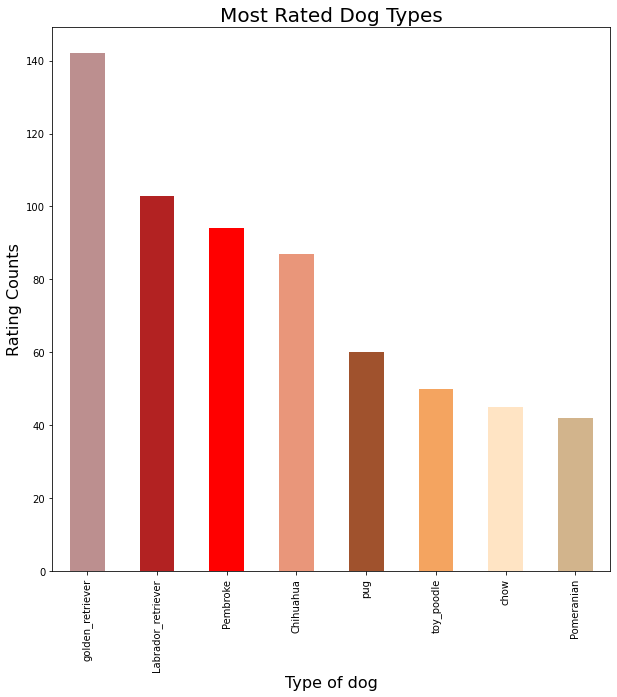

In [111]:
best_dogs = tweet_image.groupby('dog_type').filter(lambda x: len(x) >= 40)
colors=['rosybrown','firebrick','red','darksalmon','sienna','sandybrown','bisque','tan']
best_dogs['dog_type'].value_counts().plot(kind = 'bar',color=colors,figsize=(10,10))
plt.title('Most Rated Dog Types',fontsize=20)
plt.xlabel('Type of dog', fontsize=16)
plt.ylabel('Rating Counts',fontsize=16)

fig = plt.gcf() 
fig.savefig('most_rated_dog.png',bbox_inches='tight');

[#resources](https://stackoverflow.com/questions/45376232/how-to-save-image-created-with-pandas-dataframe-plot/45379210)

In [112]:
highest_rated_golden=tweet_image[tweet_image['dog_type']=='golden_retriever'].max()

In [113]:
highest_rated_golden.dog_stage

'puppo'

In [114]:
#to get the imaage url for the dog 
highest_rated_golden.jpg_url

'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg'

##### And this puppo is the Highest rated Dog ;) among rated Golden Retreivers  ... Good one :) 
<img src="https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg" alt="Drawing" style="width: 400px;"/>

<a id='2'></a>
#### 2-Saluki Dogs has got the highest avergae likes per tweet

In [115]:
#Exploring the dog types by summing all other values 
dogs_likes_all = final_d.groupby(by=['dog_type']).sum()

In [116]:
#Forming a dataset of dog types relying on the average value to get a better insight into each dog type
dogs_likes_avg = final_d.groupby(by=['dog_type']).mean()

In [117]:
dogs_likes_avg['favorite_count'].max()

24060.0

In [118]:
Most_liked_type=dogs_likes_avg[dogs_likes_avg['favorite_count']==24060.0]

In [119]:
Most_liked_type

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count
dog_type,,,,,,
Saluki,8.315403e+17,12.5,10.0,5133.75,24060.0,3200905.0


In [120]:
Saluki=tweet_image[tweet_image['dog_type']=='Saluki']

In [121]:
Saluki['rating_numerator'].max()
highest_Saluki=Saluki[Saluki['rating_numerator']==13.0]

In [122]:
highest_Saluki

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list
147,877316821321428993,2017-06-21 00:06:44+00:00,Twitter for iPhone,Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13.0,10.0,Dante,None,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,Saluki,0.509967
207,881666595344535552,2017-07-03 00:11:11+00:00,Twitter for iPhone,This is Gary. He couldn't miss this puppertuni...,https://twitter.com/dog_rates/status/881666595...,13.0,10.0,Gary,None,https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg,Saluki,0.529012
1145,817120970343411712,2017-01-05 21:29:55+00:00,Twitter for iPhone,Name a more iconic quartet... I'll wait. 13/10...,https://twitter.com/dog_rates/status/817120970...,13.0,10.0,None,None,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,Saluki,0.568809


In [123]:
dante=final_d[final_d['tweet_id']==877316821321428993]

In [124]:
dante['favorite_count'].values[0]

27907

In [125]:
Gary=final_d[final_d['tweet_id']==881666595344535552]

In [126]:
Gary['favorite_count'].values[0]

51522

In [127]:
get_Gary=highest_Saluki[highest_Saluki['name']=='Gary']
get_Gary['expanded_urls'][207]

'https://twitter.com/dog_rates/status/881666595344535552/photo/1'

###### So, Gary got favorte for 51,522 time , pretty impressive, right?
<img src="https://pbs.twimg.com/media/DDxPFwbWAAEbVVR?format=jpg&name=900x900" alt="Drawing" style="width: 400px;"/>

###### Dante has gotten 27,907 likes for his raincoat :D 
<img src="https://pbs.twimg.com/media/DCza_vrXgAIGJqy?format=jpg&name=small" alt="Drawing" style="width: 400px;"/>

In [128]:
get_Dante=highest_Saluki[highest_Saluki['name']=='Dante']

In [129]:
get_Dante['expanded_urls'][147]

'https://twitter.com/dog_rates/status/877316821321428993/photo/1,https://twitter.com/dog_rates/status/877316821321428993/photo/1'

In [130]:
the_most_liked_dog_tweet=final_d[final_d['favorite_count']==132810]

In [131]:
most_liked_dog_tweet=tweet_image[tweet_image['tweet_id']==822872901745569793]

In [132]:
most_liked_dog_tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list
2107,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015


#### Yet, away from Saluki dogs we can't forget that this Lakeland_terrier has a favorite count of 132,810 which is the highest of all
<img src="https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn?format=jpg&name=medium" alt="Drawing" style="width: 400px;"/>

In [133]:
tweet_image['expanded_urls'][1619]

'https://twitter.com/dog_rates/status/733460102733135873/photo/1'

In [134]:
the_most_liked_dog_tweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,user_count
1619,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,48265,132810,3200894


<a id='3'></a>
##### 3-relation between rating numerator and retweet count

##### Once your rating exceed 20 your chances of retweeting gets less (seem those who get 10 to 20 have the highest chances of maximum retweets

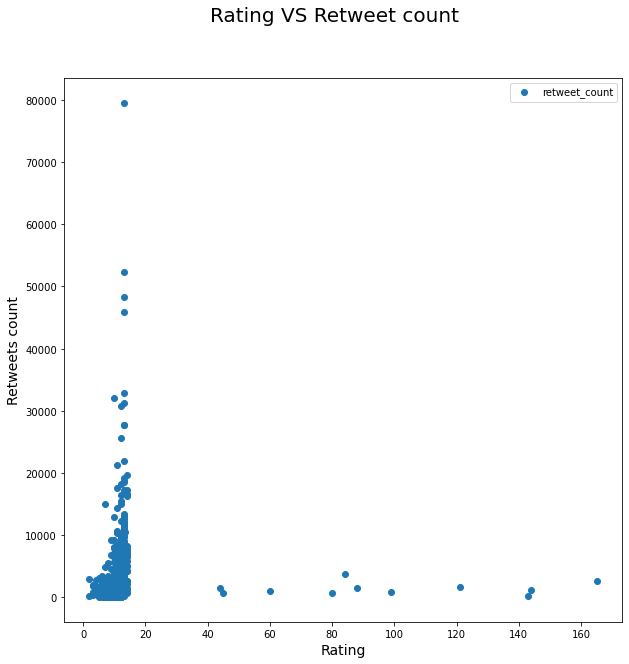

In [135]:
final_d.plot(x='rating_numerator', y='retweet_count', style='o',figsize=(10,10))
fig_2 = plt.gcf() 
fig_2.suptitle('Rating VS Retweet count', fontsize=20)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Retweets count', fontsize=14)
fig_2.savefig('rating_vs_retweet_.png',bbox_inches='tight');

<a id='4'></a>
#### 4-Bedlington Terrier gets the most average retweets per tweet among all dog types

In [136]:

dogs_avg=dogs_likes_avg[dogs_likes_avg['retweet_count']>4000]

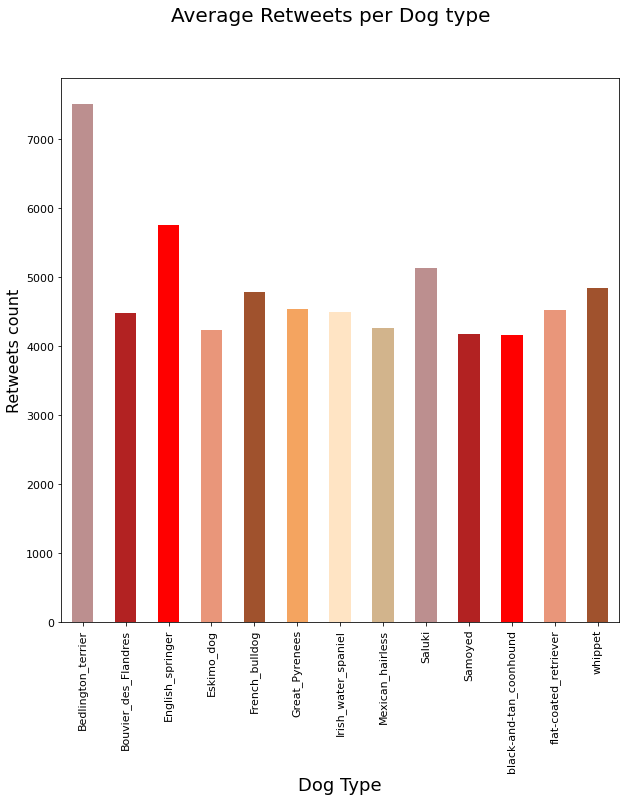

In [137]:
dogs_avg['retweet_count'].plot(kind='bar',color=colors,fontsize=11,figsize=(10,10))
fig_3 = plt.gcf()
fig_3.suptitle('Average Retweets per Dog type', fontsize=20)
plt.xlabel('Dog Type', fontsize=18)
plt.ylabel('Retweets count', fontsize=16)
fig_3.savefig('bedlington_terrier_.png',bbox_inches='tight');

<a id='the_one'></a>

<a id='5'></a>
<b>5- Dog Names</b>

In [138]:
name_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7.0,10.0,Biden,None,234,489,3201016
4,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10.0,Cupcake,None,96,327,3201016
5,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10.0,Reese,None,66,203,3201016
6,667470559035432960,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10.0,a,None,102,273,3201016
8,667495797102141441,2015-11-20 00:12:54+00:00,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9.0,10.0,Philippe,None,294,565,3201016


In [139]:
names_list = name_df.name.value_counts().index.tolist()

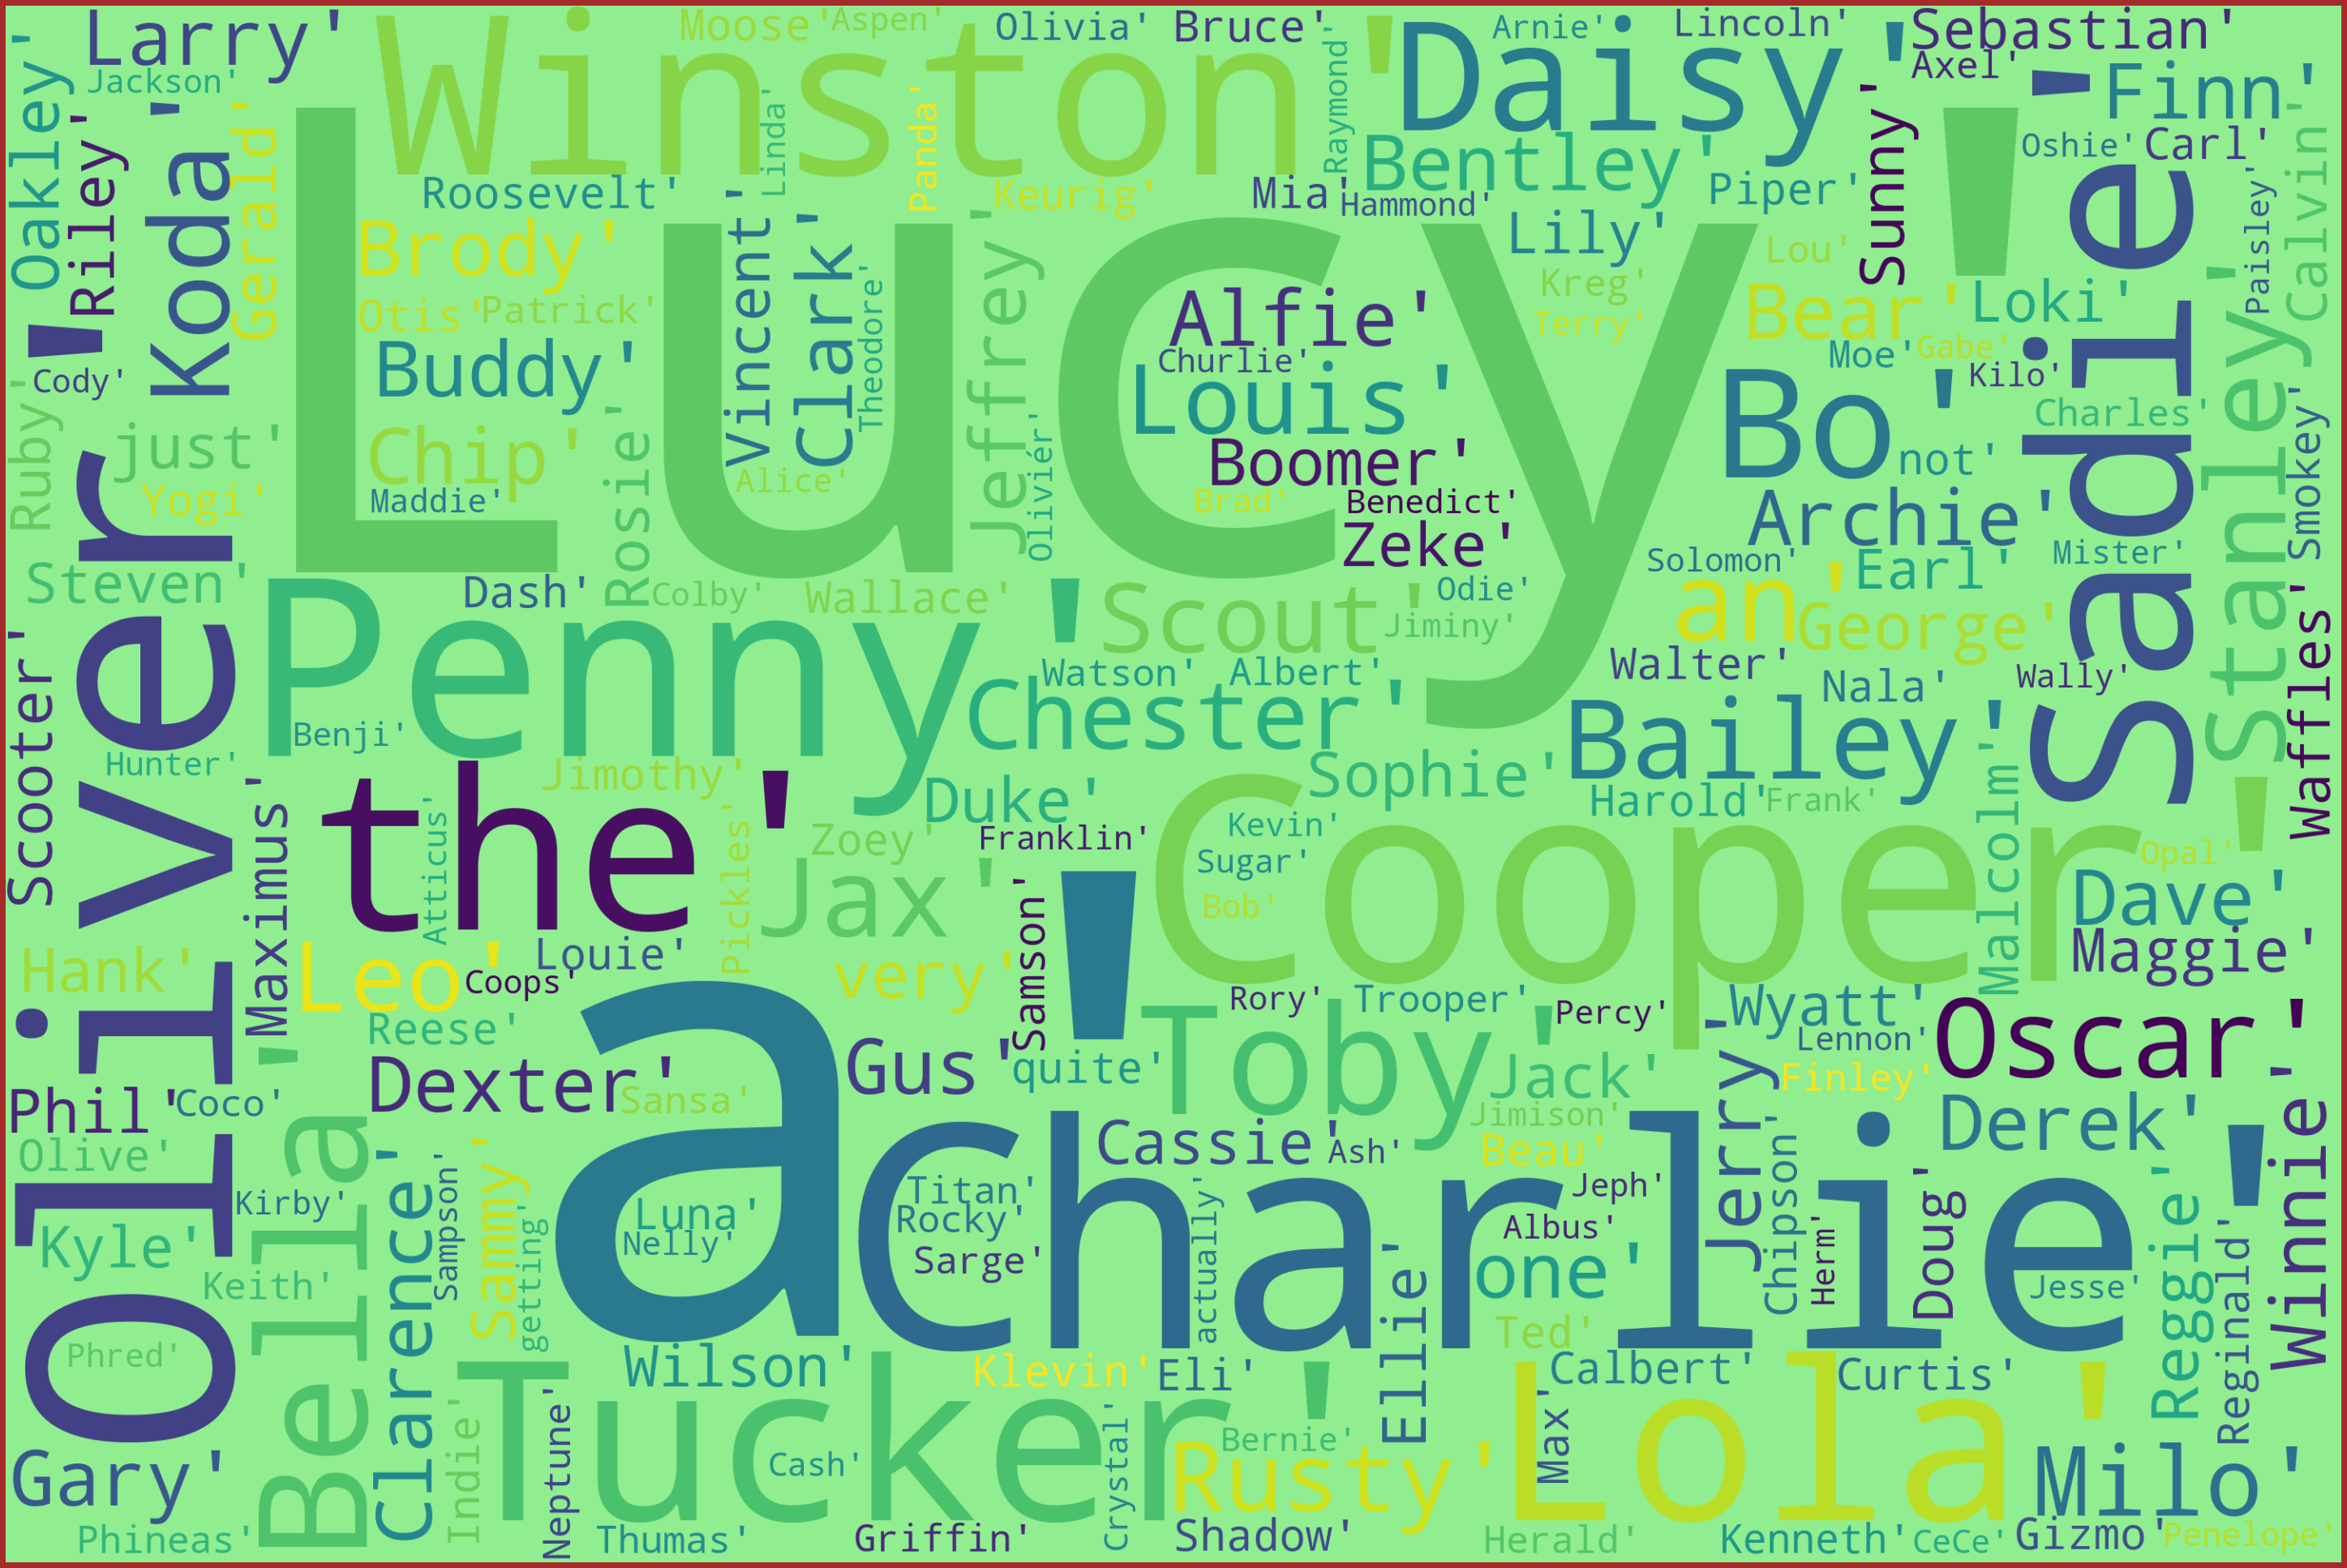

In [140]:
text = names_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'lightgreen',
    stopwords = STOPWORDS).generate(str(text))
fig_4 = plt.figure(
    figsize = (40, 30),
    facecolor = 'brown',
    edgecolor = 'blue')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig_4.savefig('Dog_Names_2.png');

[resource_only for the wordcolud image](https://www.sharpdesigns.xyz/pages/wrangle_act.html)

##### Project Details

[<b>1. Gathering data</b>](#g_d)

[<b>2. Assessing data</b>](#a_d)

[Twitter Archive Enhanced](#a_d1)

[Image Predictions](#a_d2)

[API](#a_d3)

[<b>Quality</b>](#q)

[<b>Tidiness</b>](#t)

[<b>3. Cleaning data</b>](#c_d)

[<b>4. Storing</b>](#s)

[<b>5. Analyzing</b>](#a)

[<b>6. Insights and Visualizing</b>](#v)

[1) Golden Retreiver, is likeable](#1)

[2) Most favorite likes?](#2)

[3) Rating VS Retweet](#3)

[4) Which dog type that most likely will get retweeted](#4)

[5) Dog Names](#5)

[<b>7. Reporting Data Analysis efforts</b>](#r_a)

[<b>8. Reporting Data Analysis and Visualization</b>](#r_v)